Este notebook serviu para comparar os dados médios diários do ano de 2019 e 2020, eu comentei os gráficos que mostravam a média e variância dos 7 messes de cada ano porque são irrelevantes para mostrar, também ocultei os gráficos referentes a velocidade e aceleração dos valores pois foram difícil de ver alguma diferença entre eles.

Logo, foi interessante comparar os dados médios diários do ano de 2019 e 2020, pois pôde ver que os valores dos dias exato ao ano anterior.

In [5]:
# Gerar os labels das datas
import datetime

dt = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2020, 7, 30)
step = datetime.timedelta(days=1)

datas = []

while dt < end:
    datas.append(dt.strftime('%m-%d'))
    dt += step

# 1. Import Necessários

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import metodos_imputacao as m_imputacao
import metodos_avaliacao as m_avalacao
import suavizacao_plot as s_plot
import funcoes_importantes as f_im

mimputacao = m_imputacao.metodos_de_imputacao()
fi = f_im.funcoes_importantes()
warnings.filterwarnings('ignore')

# 2. Carregar dados

In [7]:
# Bases de Cerqueira Cesar 

ccesar_16 = pd.read_csv('../01.Dados/CSV/CO_Cerqueria_2016.csv').reset_index(drop=True).iloc[:-1,:]
ccesar_17 = pd.read_csv('../01.Dados/CSV/CO_Cerqueria_2017.csv')
ccesar_18 = pd.read_csv('../01.Dados/CSV/CO_Cerqueria_2018.csv')
ccesar_19 = pd.read_csv('../01.Dados/CSV/CO_Cerqueria_2019.csv')
ccesar_20 = pd.read_csv('../01.Dados/CSV/CO_Cerqueria_2020.csv').reset_index(drop=True).iloc[:-1,:]

# Base de Congonhas

congonhas_16 = pd.read_csv('../01.Dados/CSV/CO_Congonhas_2016.csv').reset_index(drop=True).iloc[:-1,:]
congonhas_17 = pd.read_csv('../01.Dados/CSV/CO_Congonhas_2017.csv')
congonhas_18 = pd.read_csv('../01.Dados/CSV/CO_Congonhas_2018.csv')
congonhas_19 = pd.read_csv('../01.Dados/CSV/CO_Congonhas_2019.csv')
congonhas_20 = pd.read_csv('../01.Dados/CSV/CO_Congonhas_2020.csv').reset_index(drop=True).iloc[:-1,:]

# Base de Mooca

mooca_16 = pd.read_csv('../01.Dados/CSV/CO_Mooca_2016.csv').reset_index(drop=True).iloc[:-1,:]
mooca_17 = pd.read_csv('../01.Dados/CSV/CO_Mooca_2017.csv')
mooca_18 = pd.read_csv('../01.Dados/CSV/CO_Mooca_2018.csv')
mooca_19 = pd.read_csv('../01.Dados/CSV/CO_Mooca_2019.csv')
mooca_20 = pd.read_csv('../01.Dados/CSV/CO_Mooca_2020.csv').reset_index(drop=True).iloc[:-1,:]

# Base Parque Pedro II

ppredo_16 = pd.read_csv('../01.Dados/CSV/CO_P_Pedro_2016.csv').reset_index(drop=True).iloc[:-1,:]
ppredo_17 = pd.read_csv('../01.Dados/CSV/CO_P_Pedro_2017.csv')
ppredo_18 = pd.read_csv('../01.Dados/CSV/CO_P_Pedro_2018.csv')
ppredo_19 = pd.read_csv('../01.Dados/CSV/CO_P_Pedro_2019.csv')
ppredo_20 = pd.read_csv('../01.Dados/CSV/CO_P_Pedro_2020.csv').reset_index(drop=True).iloc[:-1,:]

# Base Pinheiros 

pinheiros_16 = pd.read_csv('../01.Dados/CSV/CO_Pinheiros_2016.csv').reset_index(drop=True).iloc[:-1,:]
pinheiros_17 = pd.read_csv('../01.Dados/CSV/CO_Pinheiros_2017.csv')
pinheiros_18 = pd.read_csv('../01.Dados/CSV/CO_Pinheiros_2018.csv')
pinheiros_19 = pd.read_csv('../01.Dados/CSV/CO_Pinheiros_2019.csv')
pinheiros_20 = pd.read_csv('../01.Dados/CSV/CO_Pinheiros_2020.csv').reset_index(drop=True).iloc[:-1,:]

mes_null = pd.DataFrame([[np.nan]*24 for i in range(365-pinheiros_16.shape[0])], columns=[str(i) for i in range(1,25)])
pinheiros_16 = pd.concat([pinheiros_16, mes_null], axis='rows')

# 3.Tratamento de dados Faltantes

# 3.1 Base de Cerqueira Cesar

In [8]:
Cerqueira_Cesar_16 = [ccesar_16,congonhas_16,mooca_16,ppredo_16,pinheiros_16]
Cerqueira_Cesar_17 = [ccesar_17,congonhas_17,mooca_17,ppredo_17,pinheiros_17]
Cerqueira_Cesar_18 = [ccesar_18,congonhas_18,mooca_18,ppredo_18,pinheiros_18]
Cerqueira_Cesar_19 = [ccesar_19,congonhas_19,mooca_19,ppredo_19,pinheiros_19]
Cerqueira_Cesar_20 = [ccesar_20,congonhas_20,mooca_20,ppredo_20,pinheiros_20]   
raio_ccessar       = [7,7.4,4.7,3]

ccesar_16,a,b,c = mimputacao.completa_serie_IID(Cerqueira_Cesar_16,raio_ccessar)
ccesar_17,a,b,c = mimputacao.completa_serie_IID(Cerqueira_Cesar_17,raio_ccessar)
ccesar_18,a,b,c = mimputacao.completa_serie_IID(Cerqueira_Cesar_18,raio_ccessar)
ccesar_19,a,b,c = mimputacao.completa_serie_IID(Cerqueira_Cesar_19,raio_ccessar)
ccesar_20,a,b,c = mimputacao.completa_serie_IID(Cerqueira_Cesar_20,raio_ccessar)

# 3.2 Base de Congonhas

In [9]:
raio_congonhas = [2.79,7.26,7,8.73]
Congonhas_16   = [congonhas_16,pinheiros_16,ccesar_16,ppredo_16]
Congonhas_17   = [congonhas_17,pinheiros_17,ccesar_17,ppredo_17]
Congonhas_18   = [congonhas_18,pinheiros_18,ccesar_18,ppredo_18]
Congonhas_19   = [congonhas_19,pinheiros_19,ccesar_19,ppredo_19]
Congonhas_20   = [congonhas_20,pinheiros_20,ccesar_20,ppredo_20]

congonhas_16,a,b,c = mimputacao.completa_serie_EM(congonhas_16)
congonhas_17,a,b,c = mimputacao.completa_serie_EM(congonhas_17)
congonhas_18,a,b,c = mimputacao.completa_serie_EM(congonhas_18)
congonhas_19,a,b,c = mimputacao.completa_serie_EM(congonhas_19)
congonhas_20,a,b,c = mimputacao.completa_serie_EM(congonhas_20)

# 3.3 Base de Mooca

In [10]:
raio_Mooca = [2.84,7.33]
Mooca_16   = [mooca_16,pinheiros_16,ccesar_16]
Mooca_17   = [mooca_17,pinheiros_17,ccesar_17]
Mooca_18   = [mooca_18,pinheiros_18,ccesar_18]
Mooca_19   = [mooca_19,pinheiros_19,ccesar_19]
Mooca_20   = [mooca_20,pinheiros_20,ccesar_20]

mooca_16,a,b,c = mimputacao.completa_serie_IID(Mooca_16,raio_Mooca)
mooca_17,a,b,c = mimputacao.completa_serie_IID(Mooca_17,raio_Mooca)
mooca_18,a,b,c = mimputacao.completa_serie_IID(Mooca_18,raio_Mooca)
mooca_19,a,b,c = mimputacao.completa_serie_IID(Mooca_19,raio_Mooca)
mooca_20,a,b,c = mimputacao.completa_serie_IID(Mooca_20,raio_Mooca)

# 3.4 Base Parque Pedro II

In [11]:
raio_parque_pedro_II = [2.81,4.68,7.73,8.71]
Parque_Pedro_II_16   = [ppredo_16,mooca_16,ccesar_16,pinheiros_16,congonhas_16]
Parque_Pedro_II_17   = [ppredo_17,mooca_17,ccesar_17,pinheiros_17,congonhas_17]
Parque_Pedro_II_18   = [ppredo_18,mooca_18,ccesar_18,pinheiros_18,congonhas_18]
Parque_Pedro_II_19   = [ppredo_19,mooca_19,ccesar_19,pinheiros_19,congonhas_19]
Parque_Pedro_II_20   = [ppredo_20,mooca_20,ccesar_20,pinheiros_20,congonhas_20]

ppredo_16,a,b,c = mimputacao.completa_serie_IID(Parque_Pedro_II_16,raio_parque_pedro_II)
ppredo_17,a,b,c = mimputacao.completa_serie_IID(Parque_Pedro_II_17,raio_parque_pedro_II)
ppredo_18,a,b,c = mimputacao.completa_serie_IID(Parque_Pedro_II_18,raio_parque_pedro_II)
ppredo_19,a,b,c = mimputacao.completa_serie_IID(Parque_Pedro_II_19,raio_parque_pedro_II)
ppredo_20,a,b,c = mimputacao.completa_serie_IID(Parque_Pedro_II_20,raio_parque_pedro_II)

# 3.5 Base Pinheiros 

In [12]:
Pinheiros_16   = [pinheiros_16,ccesar_16,ppredo_16,congonhas_16]
Pinheiros_17   = [pinheiros_17,ccesar_17,ppredo_17,congonhas_17]
Pinheiros_18   = [pinheiros_18,ccesar_18,ppredo_18,congonhas_18]
Pinheiros_19   = [pinheiros_19,ccesar_19,ppredo_19,congonhas_19]
Pinheiros_20   = [pinheiros_20,ccesar_20,ppredo_20,congonhas_20]
raio_pinheiros = [3.15,7.76,7.26]

pinheiros_16,a,b,c = mimputacao.completa_serie_IID(Pinheiros_16,raio_pinheiros)
pinheiros_17,a,b,c = mimputacao.completa_serie_IID(Pinheiros_17,raio_pinheiros)
pinheiros_18,a,b,c = mimputacao.completa_serie_IID(Pinheiros_18,raio_pinheiros)
pinheiros_19,a,b,c = mimputacao.completa_serie_IID(Pinheiros_19,raio_pinheiros)
pinheiros_20,a,b,c = mimputacao.completa_serie_IID(Pinheiros_20,raio_pinheiros)

<div style='border: 1px red solid'></div>

# 4. Média e variância dos anos

In [13]:
# fi.plot_anotate([ccesar_16,ccesar_17,ccesar_18,ccesar_19,ccesar_20],'var')
# fi.plot_anotate([ccesar_16,ccesar_17,ccesar_18,ccesar_19,ccesar_20],'mean')

In [14]:
# fi.plot_anotate([congonhas_16,congonhas_17,congonhas_18,congonhas_19,congonhas_20],'var')
# fi.plot_anotate([congonhas_16,congonhas_17,congonhas_18,congonhas_19,congonhas_20],'mean')

In [15]:
# fi.plot_anotate([mooca_16,mooca_17,mooca_18,mooca_19,mooca_20],'var')
# fi.plot_anotate([mooca_16,mooca_17,mooca_18,mooca_19,mooca_20],'mean')

In [16]:
# fi.plot_anotate([ppredo_16,ppredo_17,ppredo_18,ppredo_19,ppredo_20],'var')
# fi.plot_anotate([ppredo_16,ppredo_17,ppredo_18,ppredo_19,ppredo_20],'mean')

In [17]:
# fi.plot_anotate([pinheiros_16,pinheiros_17,pinheiros_18,pinheiros_19,pinheiros_20],'var')
# fi.plot_anotate([pinheiros_16,pinheiros_17,pinheiros_18,pinheiros_19,pinheiros_20],'mean')

<div style='border: 1px red solid'></div>

# 5. Velocidade em comparação com os anos

In [18]:
# plt.figure(figsize=(40,10))
# plt.plot(ccesar_19.mean(axis='columns').diff(),'*-')
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=15);
# plt.grid()
# plt.show()

# plt.figure(figsize=(40,10))
# plt.plot(ccesar_20.mean(axis='columns').diff(),'*-')
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=15);
# plt.grid()
# plt.show()

In [19]:
# plt.figure(figsize=(40,10))
# plt.plot(congonhas_19.mean(axis='columns').diff(),'*-')
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=15);
# plt.grid()
# plt.show()

# plt.figure(figsize=(40,10))
# plt.plot(congonhas_20.mean(axis='columns').diff(),'*-')
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=15);
# plt.grid()
# plt.show()

In [20]:
# plt.figure(figsize=(40,10))
# plt.plot(mooca_19.mean(axis='columns').diff(),'*-')
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=15);
# plt.grid()
# plt.show()

# plt.figure(figsize=(40,10))
# plt.plot(mooca_20.mean(axis='columns').diff(),'*-')
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=15);
# plt.grid()
# plt.show()

In [21]:
# plt.figure(figsize=(40,10))
# plt.plot(ppredo_19.mean(axis='columns').diff(),'*-')
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=15);
# plt.grid()
# plt.show()

# plt.figure(figsize=(40,10))
# plt.plot(ppredo_20.mean(axis='columns').diff(),'*-')
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=15);
# plt.grid()
# plt.show()

In [22]:
# plt.figure(figsize=(40,10))
# plt.plot(pinheiros_19.mean(axis='columns').diff(),'*-')
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=15);
# plt.grid()
# plt.show()

# plt.figure(figsize=(40,10))
# plt.plot(pinheiros_20.mean(axis='columns').diff(),'*-')
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=15);
# plt.grid()
# plt.show()

<div style='border: 1px red solid'></div>

# 6. Aceleração em comparação com os anos

In [23]:
# plt.figure(figsize=(40,10))
# plt.plot((ccesar_19.mean(axis='columns').diff()).diff(),'*-')
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=15);
# plt.grid()
# plt.show()

# plt.figure(figsize=(40,10))
# plt.plot((ccesar_20.mean(axis='columns').diff()).diff(),'*-')
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=15);
# plt.grid()
# plt.show()

In [24]:
# plt.figure(figsize=(40,10))
# plt.plot((congonhas_19.mean(axis='columns').diff()).diff(),'*-')
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=15);
# plt.grid()
# plt.show()

# plt.figure(figsize=(40,10))
# plt.plot((congonhas_20.mean(axis='columns').diff()).diff(),'*-')
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=15);
# plt.grid()
# plt.show()

In [25]:
# plt.figure(figsize=(40,10))
# plt.plot((mooca_19.mean(axis='columns').diff()).diff(),'*-')
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=15);
# plt.grid()
# plt.show()

# plt.figure(figsize=(40,10))
# plt.plot((mooca_20.mean(axis='columns').diff()).diff(),'*-')
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=15);
# plt.grid()
# plt.show()

In [26]:
# plt.figure(figsize=(40,10))
# plt.plot((ppredo_19.mean(axis='columns').diff()).diff(),'*-')
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=15);
# plt.grid()
# plt.show()

# plt.figure(figsize=(40,10))
# plt.plot((ppredo_20.mean(axis='columns').diff()).diff(),'*-')
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=15);
# plt.grid()
# plt.show()

In [27]:
# plt.figure(figsize=(40,10))
# plt.plot((pinheiros_19.mean(axis='columns').diff()).diff(),'*-')
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=15);
# plt.grid()
# plt.show()

# plt.figure(figsize=(40,10))
# plt.plot((pinheiros_20.mean(axis='columns').diff()).diff(),'*-')
# plt.plot(83,0,marker='v',markerfacecolor='red',markersize=15);
# plt.grid()
# plt.show()

<div style='border: 1px red solid'></div>

# 7. Gradiente antes e depois

# 7.1 Gradiente antes e depois diariamente

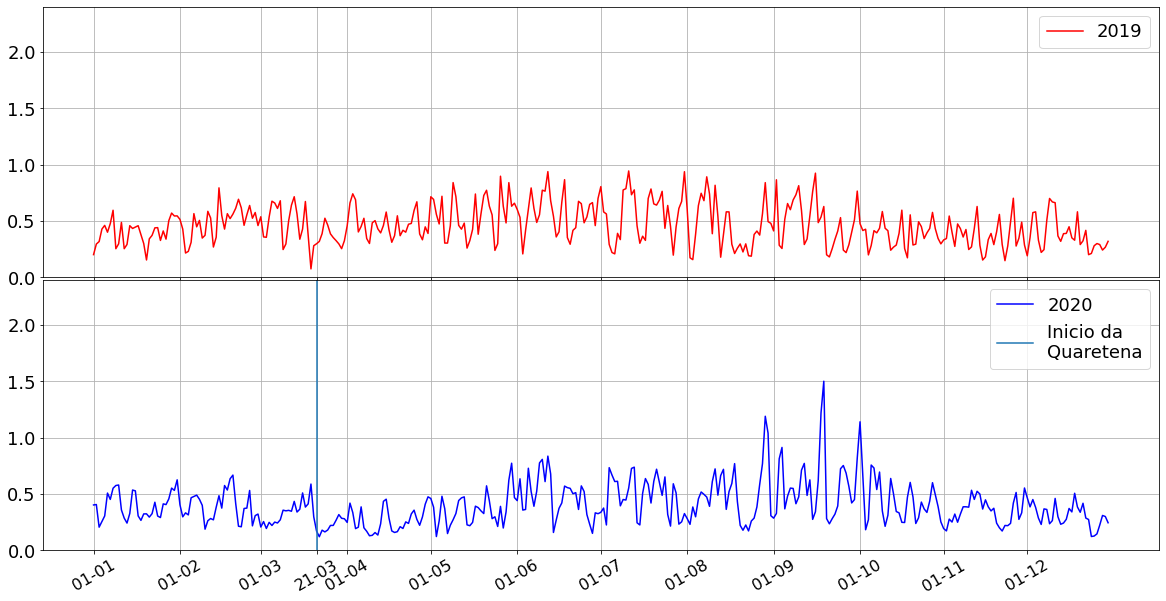

In [97]:
fig, (ax1, ax2) = plt.subplots(2,sharex=True, sharey=True, gridspec_kw={'hspace': 0.01},figsize=(20,10))

ax1.plot(ccesar_19.round(2).mean(axis='columns'),'-',color='red',label='2019')
ax2.plot(ccesar_20.round(2).mean(axis='columns'),'-',color='blue',label='2020')
ax2.plot([80,80], [0.0,2.4],label='Inicio da\nQuaretena')

ax1.legend(loc='best', fontsize = 18)
ax2.legend(loc='best', fontsize = 18)

ax1.tick_params(axis = "y", labelsize = 18) 
ax2.tick_params(axis = "y", labelsize = 18) 

plt.xticks(size = 16)

plt.ylim(0.0, 2.4)

plt.xticks([0, 31, 60, 80, 91, 121,
            152, 182, 213, 244, 275, 305,
            335],
           ['01-01','01-02','01-03','21-03','01-04','01-05',
            '01-06','01-07','01-08','01-09','01-10','01-11',
            '01-12'],
           rotation=30)

ax1.grid()
ax2.grid();
plt.show()

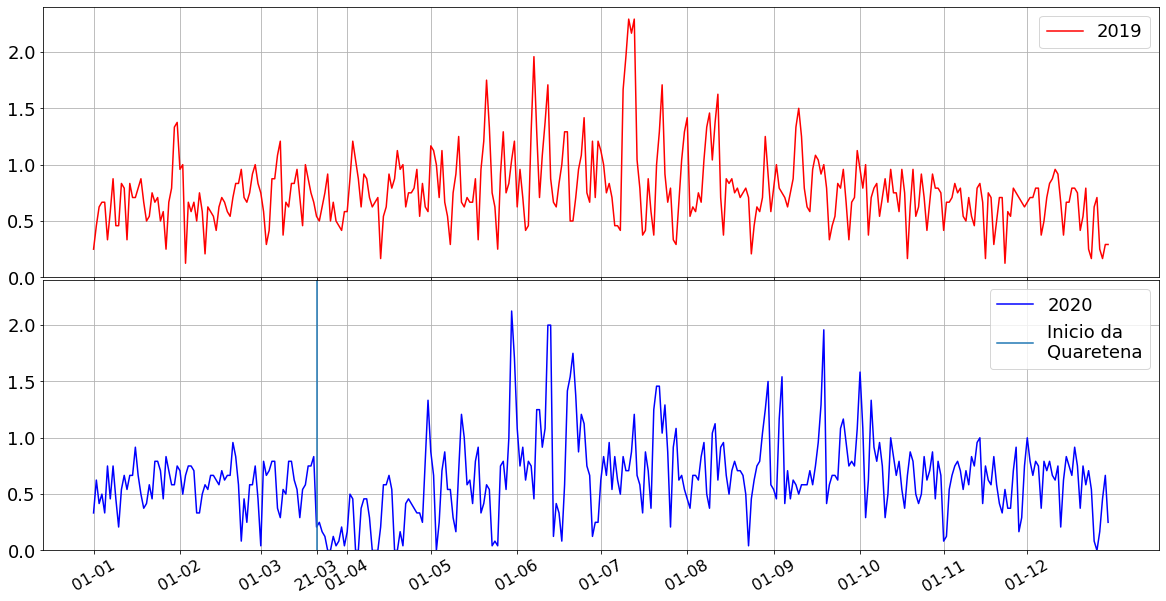

In [98]:
fig, (ax1, ax2) = plt.subplots(2,sharex=True, sharey=True, gridspec_kw={'hspace': 0.01},figsize=(20,10))
ax1.plot(congonhas_19.round(2).mean(axis='columns'),'-',color='red',label='2019')
ax2.plot(congonhas_20.round(2).mean(axis='columns'),'-',color='blue',label='2020')
ax2.plot([80,80], [0.0,2.4],label='Inicio da\nQuaretena')

ax1.legend(loc='best', fontsize = 18)
ax2.legend(loc='best', fontsize = 18)

ax1.tick_params(axis = "y", labelsize = 18) 
ax2.tick_params(axis = "y", labelsize = 18) 
 
plt.xticks(size = 16)

plt.ylim(0.0, 2.4)

plt.xticks([0, 31, 60, 80, 91, 121,
            152, 182, 213, 244, 275, 305,
            335],
           ['01-01','01-02','01-03','21-03','01-04','01-05',
            '01-06','01-07','01-08','01-09','01-10','01-11',
            '01-12'],
           rotation=30)

ax1.grid()
ax2.grid();
plt.show()

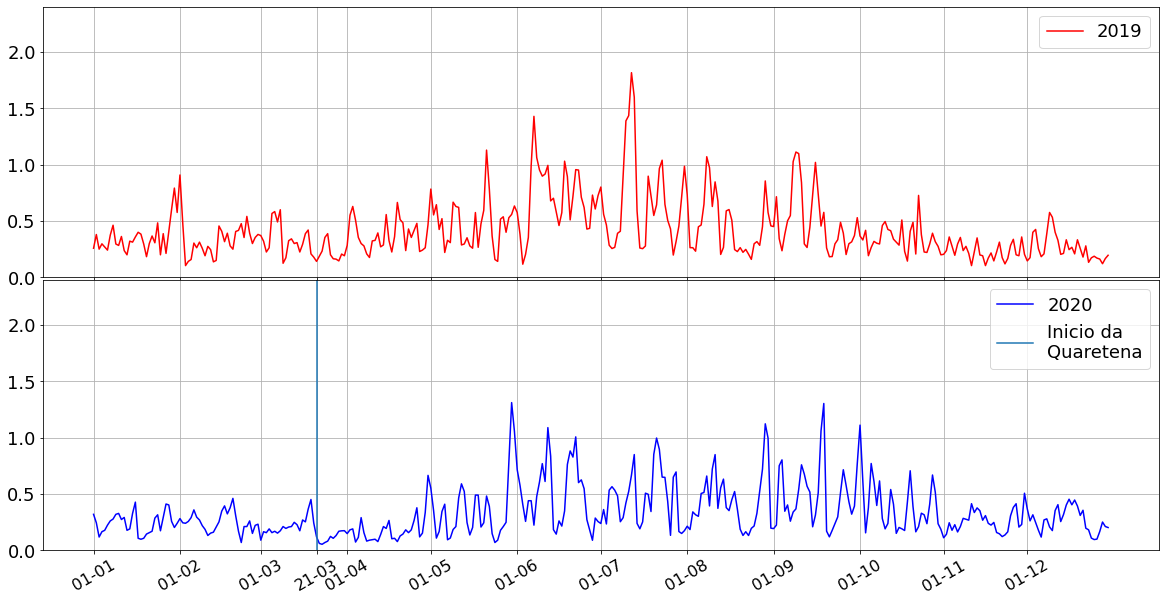

In [99]:
fig, (ax1, ax2) = plt.subplots(2,sharex=True, sharey=True, gridspec_kw={'hspace': 0.01},figsize=(20,10))
ax1.plot(ppredo_19.round(2).mean(axis='columns'),'-',color='red',label='2019')
ax2.plot(ppredo_20.round(2).mean(axis='columns'),'-',color='blue',label='2020')
ax2.plot([80,80], [0.0,2.4],label='Inicio da\nQuaretena')

ax1.legend(loc='best', fontsize = 18)
ax2.legend(loc='best', fontsize = 18)

ax1.tick_params(axis = "y", labelsize = 18) 
ax2.tick_params(axis = "y", labelsize = 18) 

plt.xticks(size = 16)

plt.ylim(0.0, 2.4)

plt.xticks([0, 31, 60, 80, 91, 121,
            152, 182, 213, 244, 275, 305,
            335],
           ['01-01','01-02','01-03','21-03','01-04','01-05',
            '01-06','01-07','01-08','01-09','01-10','01-11',
            '01-12'],
           rotation=30)

ax1.grid()
ax2.grid();
plt.show()

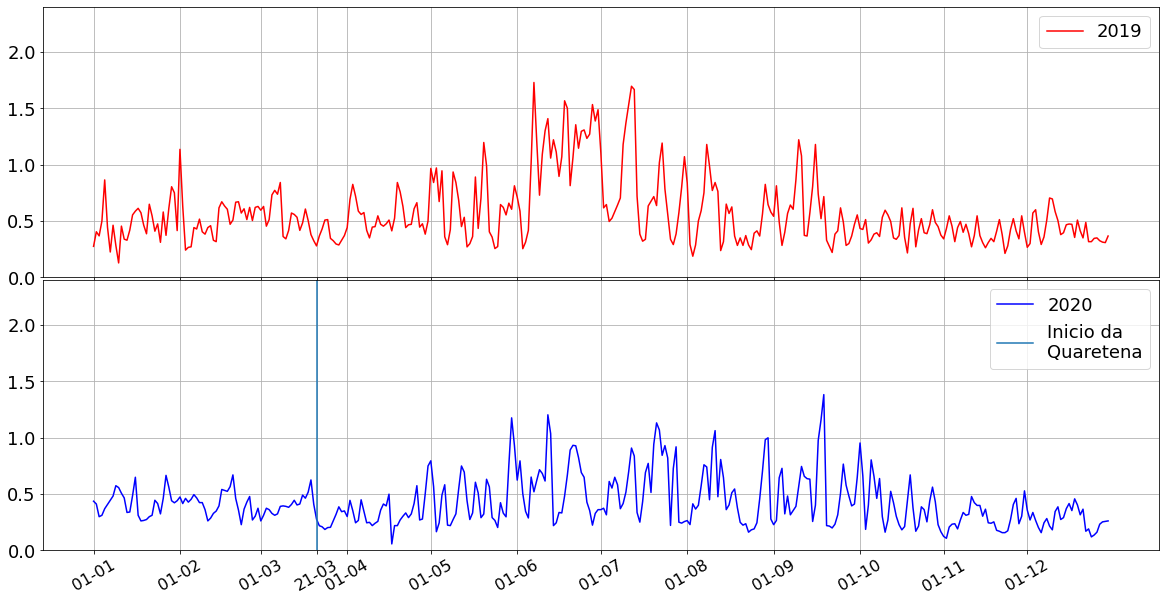

In [100]:
fig, (ax1, ax2) = plt.subplots(2,sharex=True, sharey=True, gridspec_kw={'hspace': 0.01},figsize=(20,10))
ax1.plot(mooca_19.round(2).mean(axis='columns'),'-',color='red',label='2019')
ax2.plot(mooca_20.round(2).mean(axis='columns'),'-',color='blue',label='2020')
ax2.plot([80,80], [0.0,2.4],label='Inicio da\nQuaretena')

ax1.legend(loc='best', fontsize = 18)
ax2.legend(loc='best', fontsize = 18)

ax1.tick_params(axis = "y", labelsize = 18) 
ax2.tick_params(axis = "y", labelsize = 18) 

plt.xticks(size = 16)

plt.ylim(0.0, 2.4)

plt.xticks([0, 31, 60, 80, 91, 121,
            152, 182, 213, 244, 275, 305,
            335],
           ['01-01','01-02','01-03','21-03','01-04','01-05',
            '01-06','01-07','01-08','01-09','01-10','01-11',
            '01-12'],
           rotation=30)

ax1.grid()
ax2.grid();
plt.show()

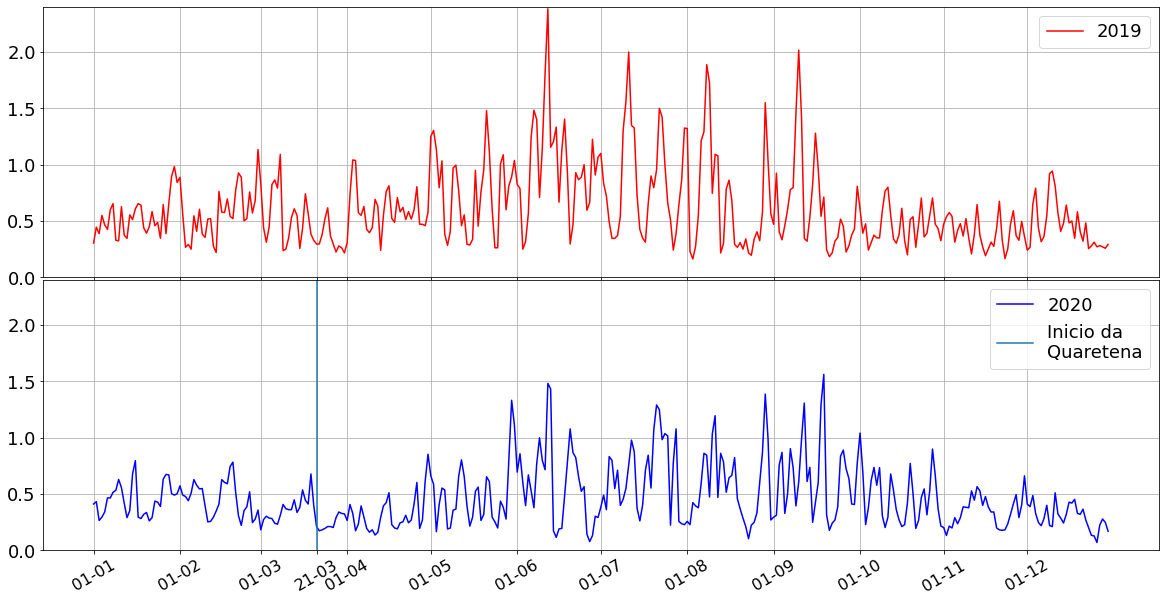

In [101]:
fig, (ax1, ax2) = plt.subplots(2,sharex=True, sharey=True, gridspec_kw={'hspace': 0.01},figsize=(20,10))
ax1.plot(pinheiros_19.round(2).mean(axis='columns'),'-',color='red',label='2019')
ax2.plot(pinheiros_20.round(2).mean(axis='columns'),'-',color='blue',label='2020')
ax2.plot([80,80], [0.0,2.4],label='Inicio da\nQuaretena')

ax1.legend(loc = 'best', fontsize = 18)
ax2.legend(loc = 'best', fontsize = 18)

ax1.tick_params(axis = "y", labelsize = 18) 
ax2.tick_params(axis = "y", labelsize = 18) 

plt.xticks(size = 16)

plt.ylim(0.0, 2.4)

plt.xticks([0, 31, 60, 80, 91, 121,
            152, 182, 213, 244, 275, 305,
            335],
           ['01-01','01-02','01-03','21-03','01-04','01-05',
            '01-06','01-07','01-08','01-09','01-10','01-11',
            '01-12'],
           rotation=30)

ax1.grid()
ax2.grid();
plt.show()

#### O que podemos ver nestes gráficos são os valores médios diários das emissões de gás cabônicos coletados nas estações, em relação ao gráfico de tendência podemos ver aqui uma maneira mais suncinta da redução das emissões desses poluentes no início de fevereiro, a maior quedas dos valores após o decreto da quarentena iniciados em março e a retomada do comércio a partir de meados do mês de abril. Contudo, os valores médios diários são menores do que os dos anos anteriores.

<div style='border: 1px red solid'></div>

# 7.2 Gradiente antes e depois mensalmente

In [33]:
# fi.gradientes_mes(ccesar_19,ccesar_20)

In [34]:
# fi.gradientes_mes(congonhas_19,congonhas_20)

In [35]:
# fi.gradientes_mes(ppredo_19,ppredo_20)

In [36]:
# fi.gradientes_mes(pinheiros_19,pinheiros_20)